# Getting started with Visualisation Libraries in Python: Using Seaborn

In [3]:
# Import pandas for managing datasets/tables
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline 
#to display your plots inside your notebook


# Seaborn for plotting and styling
import seaborn as sns

In [4]:
#read the dataset from an url
url="https://raw.githubusercontent.com/sinaimeri/examples/main/dataset1.csv"
dataset=pd.read_csv(url) # if your dataset contains no column names then you should add header=None

#read a dataset from a path in your PC
#dataset = pd.read_csv("/Users/......./dataset1.csv")


In [5]:
dataset.head()

,Entity,Code,Year,AnnualEmmission
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


## Select a subset of the dataset

In [6]:
#select the first 5 rows
dataset[0:5]

,Entity,Code,Year,AnnualEmmission
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [7]:
#select a subset of columns
dataset[["Entity","Year"]]

,Entity,Year
0,Afghanistan,1949
1,Afghanistan,1950
2,Afghanistan,1951
3,Afghanistan,1952
4,Afghanistan,1953
...,...,...
20848,Zimbabwe,2013
20849,Zimbabwe,2014
20850,Zimbabwe,2015
20851,Zimbabwe,2016


In [8]:
# To select a subset of rows and columns we use iloc
#When using loc/iloc,the part before the comma is the rows you want, 
#and the part after the comma is the columns you want to select.
#loc is label-based, which means that you have to specify rows and columns based on their row and column labels. 
#iloc is integer position-based, so you have to specify rows and columns by their integer position values (starting from 0)

# I’m interested in rows 10 till 25 and columns 3 to 5.
dataset.iloc[9:25, 2:5]

,Year,AnnualEmmission
9,1958,329760.00
10,1959,384571.42
11,1960,413883.42
12,1961,490797.70
13,1962,688594.27
14,1963,706735.98
15,1964,838550.83
16,1965,1006916.53
17,1966,1091158.82
18,1967,1281865.11


In [9]:
# we can select rows based on a condition
dataset_italy=dataset[dataset["Entity"]=="Italy"]
dataset_italy.head()

,Entity,Code,Year,AnnualEmmission
10260,Italy,ITA,1860,29312.0
10261,Italy,ITA,1861,670512.0
10262,Italy,ITA,1862,1227440.0
10263,Italy,ITA,1863,1069888.0
10264,Italy,ITA,1864,1604832.0


In [10]:
dataset_france=dataset[dataset["Entity"]=="France"]
dataset_france.head()

,Entity,Code,Year,AnnualEmmission
7233,France,FRA,1802,2238704.0
7234,France,FRA,1804,2176416.0
7235,France,FRA,1810,2121456.0
7236,France,FRA,1811,2051840.0
7237,France,FRA,1812,2216720.0


In [11]:
#select the rows for which the entity value corresponds to italy or france
dataset_IF=dataset[dataset["Entity"].isin(["Italy", "France"])]
dataset_IF.head()

,Entity,Code,Year,AnnualEmmission
7233,France,FRA,1802,2238704.0
7234,France,FRA,1804,2176416.0
7235,France,FRA,1810,2121456.0
7236,France,FRA,1811,2051840.0
7237,France,FRA,1812,2216720.0


In [12]:
#get the dimension of the data
dataset_france.shape

(210, 4)

In [13]:
dataset_italy.shape

(158, 4)

In [14]:
dataset_IF.shape

(368, 4)

## Lets start to create a plot and play with different themes

Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.

<AxesSubplot:xlabel='Year', ylabel='AnnualEmmission'>

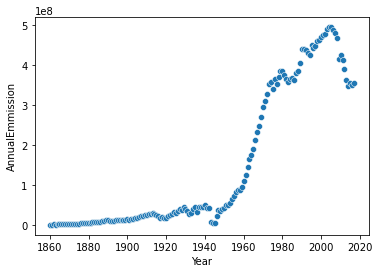

In [15]:
#A simple scatterplot: the function relplot plots the relation
sns.scatterplot(x='Year', y='AnnualEmmission', data=dataset_italy)

####  We can use the general function relplot: This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

- scatterplot() (with kind="scatter"; the default)

- lineplot() (with kind="line")

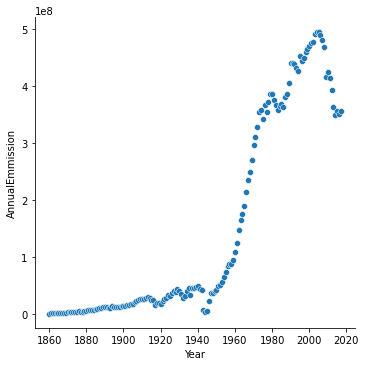

In [16]:
#A simple scatterplot: the function relplot plots the relation, scatterplot is the default
sns.relplot(x='Year', y='AnnualEmmission', data=dataset_italy, kind='scatter')

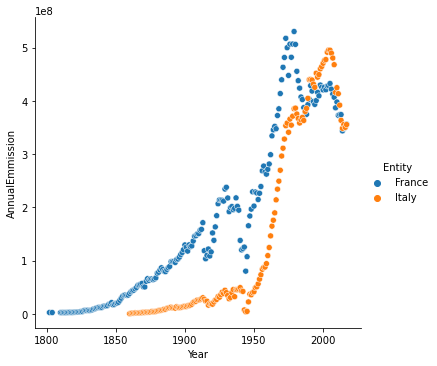

In [17]:
#While the points are plotted in two dimensions, another dimension can be added to the plot 
# by coloring the points according to a third variable. 
#In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

sns.relplot(x='Year', y='AnnualEmmission', data=dataset_IF, hue='Entity')

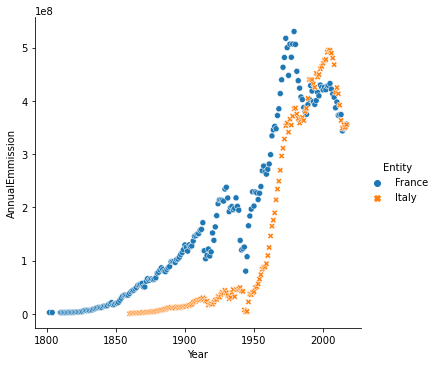

In [18]:
#To emphasize the difference between the classes, and to improve accessibility, 
#you can use a different marker style for each class:

sns.relplot(x='Year', y='AnnualEmmission', data=dataset_IF, hue='Entity', style='Entity')

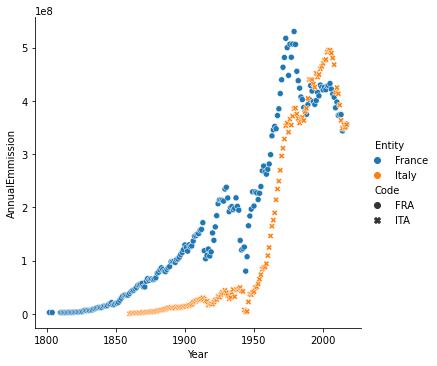

In [19]:
#It’s also possible to represent four variables by changing the hue and style of each point independently. 
#But this should be done carefully, because the eye is much less sensitive to shape than to color

sns.relplot(x='Year', y='AnnualEmmission', data=dataset_IF, hue='Entity', style='Code')

## What about subplots?


If you do not want to change the main theme inside each subplot it is easy

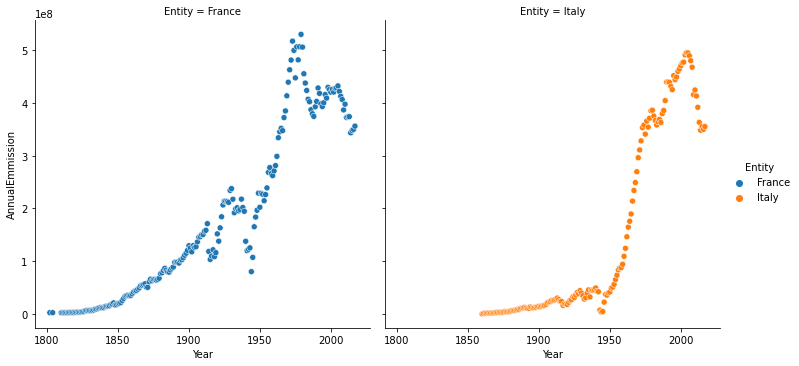

In [20]:
sns.relplot(x='Year', y='AnnualEmmission', data=dataset_IF, col='Entity', hue='Entity')

However if you want to create more complex subfigures and have the control on each one of them

Text(0.5, 1.0, 'France results')

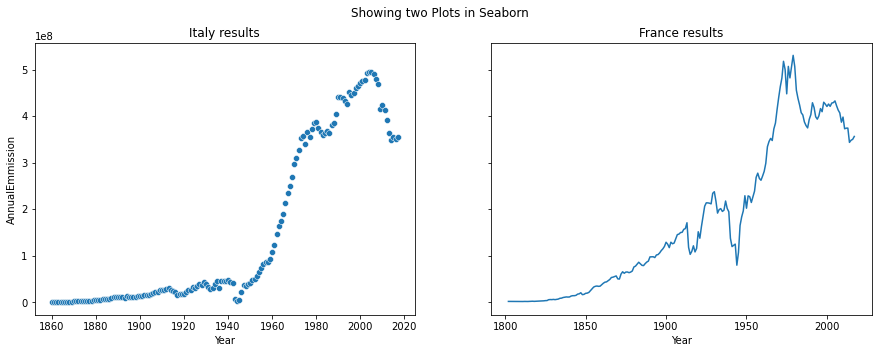

In [21]:
#figsize set the total dimension of our figure: 
#The figsize attribute allows us to specify the width and height of a figure in unit inches. 
#sharex and sharey are used to share one or both axes between the charts
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Showing two Plots in Seaborn')

sns.scatterplot(ax=axes[0],x='Year', y='AnnualEmmission', data=dataset_italy)
axes[0].set_title("Italy results")


sns.lineplot(ax=axes[1],x='Year', y='AnnualEmmission', data=dataset_france)
axes[1].set_title("France results")


## Seaborn themes

<AxesSubplot:xlabel='Year', ylabel='AnnualEmmission'>

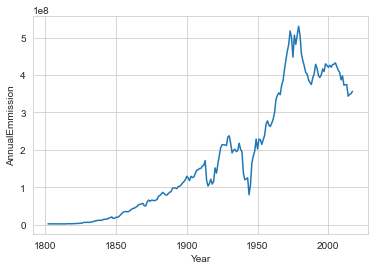

In [22]:
# To control the style, use the axes_style() and set_style() functions. 
# To scale the plot, use the plotting_context() and set_context() functions. 
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. 
# The default theme is darkgrid.
sns.set_style("whitegrid")
sns.lineplot(x='Year', y='AnnualEmmission', data=dataset_france)

### How can I plot a figure with multiple plots having different styles?

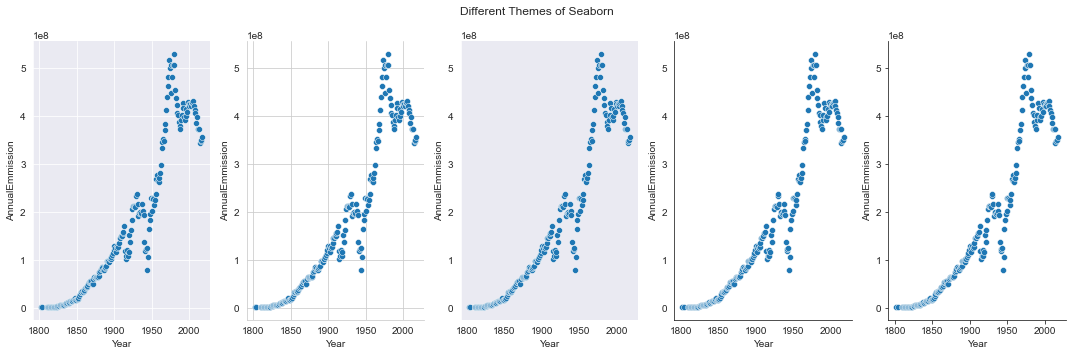

In [23]:
# The way matplotlib Axes work is that the style parameters 
# become a property of the Axes object at the time it is created,
# not at the time something is drawn onto it. 
# So while it's not possible to make a figure that has different subplot styles using plt.subplots, 
# you can do it with one of the ways where you independently create the Axes:
# add_gridspec: Specifies the geometry of the grid that a subplot will be placed. 
# The number of rows and number of columns of the grid need to be set. Optionally, the subplot layout parameters (e.g., left, right, etc.) can be tuned.


f = plt.figure(figsize=(15, 5))
gs = f.add_gridspec(1, 5)
f.suptitle('Different Themes of Seaborn')

# darkgrid
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.scatterplot(x='Year', y='AnnualEmmission', data=dataset_france)

# White grid
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.scatterplot(x='Year', y='AnnualEmmission', data=dataset_france)
    
# Dark 
with sns.axes_style("dark"):
    ax = f.add_subplot(gs[0, 2])
    sns.scatterplot(x='Year', y='AnnualEmmission', data=dataset_france)

# White 
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 3])
    sns.scatterplot(x='Year', y='AnnualEmmission', data=dataset_france)
# ticks 
with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[0, 4])
    sns.scatterplot(x='Year', y='AnnualEmmission', data=dataset_france)
    sns.despine() # if you want to remove the top and right axes spines

    
f.tight_layout()


## Lets explore different types of plots 

##### For the whole list of graphics you can see here https://www.python-graph-gallery.com/

1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Factor plots

### 1. Line plot

<AxesSubplot:xlabel='Year', ylabel='AnnualEmmission'>

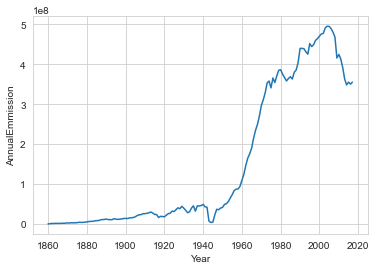

In [24]:
sns.lineplot(x='Year', y='AnnualEmmission', data=dataset_italy)

#### We will use also a categorical dataset

In [25]:
#read the dataset from an url
url="https://raw.githubusercontent.com/sinaimeri/examples/main/dataset2.csv"
dataset_pokemon=pd.read_csv(url) 

In [26]:
dataset_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [27]:
#here we have the index
dataset_pokemon=pd.read_csv(url, index_col=0) 

In [28]:
dataset_pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


#### Columns description:
1. ID for each pokemon
2. Name: Name of each pokemon
3. Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
4. Type 2: Some pokemon are dual type and have 2
5. Total: sum of all stats that come after this, a general guide to how strong a pokemon is
6. HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
7. Attack: the base modifier for normal attacks (eg. Scratch, Punch)
8. Defense: the base damage resistance against normal attacks
9. SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
10. SP Def: the base damage resistance against special attacks
11. Speed: determines which pokemon attacks first each round
12. Stage : Number of Generation
13. Legendary : True if Legendary Pokemon , False if not

In [51]:
# if you want more clearity you can rename the columns
dataset_pokemon.rename(columns = {'Type 1':'PokemonType1','Type 2':'PokemonType2','Total':'Sum of Attack'},inplace=True)

In [52]:
dataset_pokemon.head()

,Name,PokemonType1,PokemonType2,Sum of Attack,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### 2. Histograms and density plots

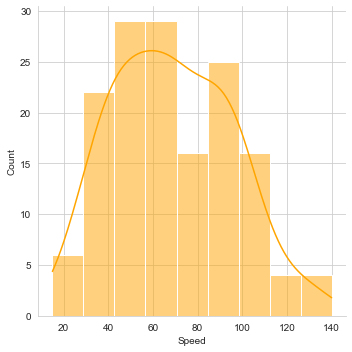

In [53]:
# Sum of Attack by Pokemon
# A kernel density estimate (KDE) represents the data using a continuous probability density curve 
# in one or more dimensions.
sns.displot(x="Speed", data=dataset_pokemon, kde=True, color="Orange")


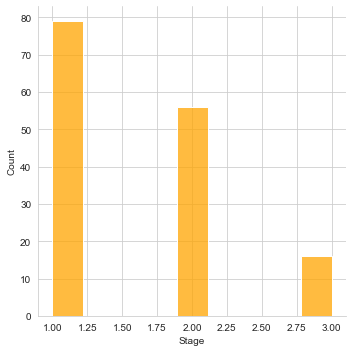

In [54]:
sns.displot(x='Stage', data=dataset_pokemon, color="Orange")


<AxesSubplot:xlabel='Stage', ylabel='count'>

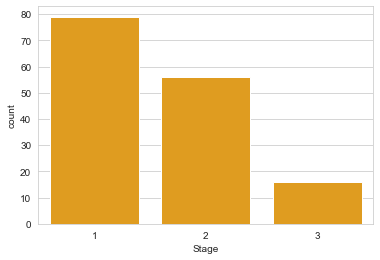

In [55]:
sns.countplot(x='Stage', data=dataset_pokemon, color="Orange")


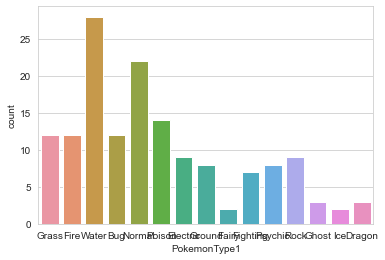

In [56]:
sns.countplot(x="PokemonType1", data=dataset_pokemon);

[Text(0, 0, 'Grass'),
 Text(1, 0, 'Fire'),
 Text(2, 0, 'Water'),
 Text(3, 0, 'Bug'),
 Text(4, 0, 'Normal'),
 Text(5, 0, 'Poison'),
 Text(6, 0, 'Electric'),
 Text(7, 0, 'Ground'),
 Text(8, 0, 'Fairy'),
 Text(9, 0, 'Fighting'),
 Text(10, 0, 'Psychic'),
 Text(11, 0, 'Rock'),
 Text(12, 0, 'Ghost'),
 Text(13, 0, 'Ice'),
 Text(14, 0, 'Dragon')]

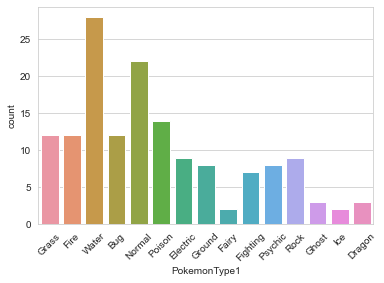

In [59]:
# Let's play with axes
# We use set_xticklabels which needs a set of labels as an argument
chart=sns.countplot(x='PokemonType1', data=dataset_pokemon);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'Grass'),
 Text(1, 0, 'Fire'),
 Text(2, 0, 'Water'),
 Text(3, 0, 'Bug'),
 Text(4, 0, 'Normal'),
 Text(5, 0, 'Poison'),
 Text(6, 0, 'Electric'),
 Text(7, 0, 'Ground'),
 Text(8, 0, 'Fairy'),
 Text(9, 0, 'Fighting'),
 Text(10, 0, 'Psychic'),
 Text(11, 0, 'Rock'),
 Text(12, 0, 'Ghost'),
 Text(13, 0, 'Ice'),
 Text(14, 0, 'Dragon')]

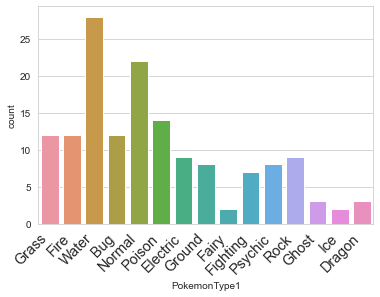

In [60]:
# And just to show a few more things that we can do with set_xticklabels() 
# we'll also set the font weight to be a bit lighter, and the font size to be a bit bigger
#using the following values: xx-small, x-small,
## small, medium, large, x-large, xx-large, larger, or smaller
chart=sns.countplot(x='PokemonType1', data=dataset_pokemon);
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right', 
    fontweight='light', 
    fontsize='x-large')

In [62]:
# Let's create a palette pf colors
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(pkmn_type_colors))

[Text(0, 0, 'Grass'),
 Text(1, 0, 'Fire'),
 Text(2, 0, 'Water'),
 Text(3, 0, 'Bug'),
 Text(4, 0, 'Normal'),
 Text(5, 0, 'Poison'),
 Text(6, 0, 'Electric'),
 Text(7, 0, 'Ground'),
 Text(8, 0, 'Fairy'),
 Text(9, 0, 'Fighting'),
 Text(10, 0, 'Psychic'),
 Text(11, 0, 'Rock'),
 Text(12, 0, 'Ghost'),
 Text(13, 0, 'Ice'),
 Text(14, 0, 'Dragon')]

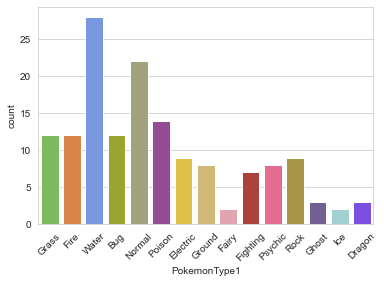

In [63]:
chart=sns.countplot(x="PokemonType1", data=dataset_pokemon, palette=customPalette)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

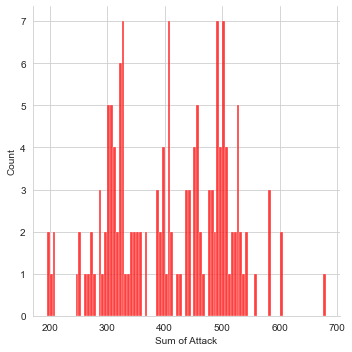

In [64]:
#countplot
sns.displot(x="Sum of Attack", data=dataset_pokemon,color="Red",bins=20,binwidth=5)

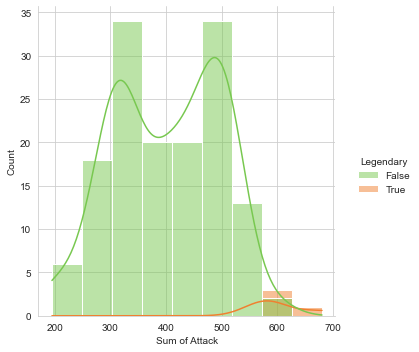

In [65]:
# Conditioning on other variables
# Once you understand the distribution of a variable, the next step is often to ask whether 
# features of that distribution differ across other variables in the dataset. 
# For example, what accounts for the distribution of Sum of Attacks lengths that we saw above? 
# Assigning a variable to hue will draw a separate histogram for each of its unique values and distinguish 
# them by color:


sns.displot(x='Sum of Attack', data=dataset_pokemon, kde=True, color="Orange", hue="Legendary")

#### Joint Distribution Plots

Joint distribution plots combine information from scatter plots and histograms to give us detailed information for bivariate distributions.


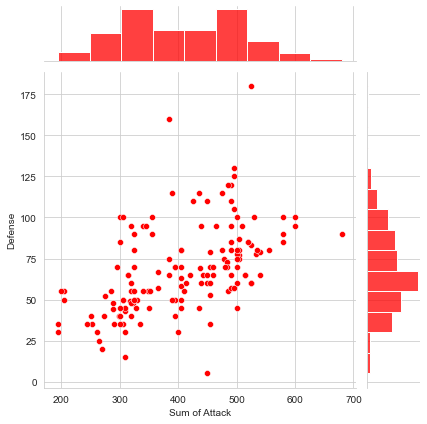

In [66]:
sns.jointplot(x='Sum of Attack',y='Defense',color="Red", data=dataset_pokemon);


#### Density plots 

Density plots display the distribution between two variables.



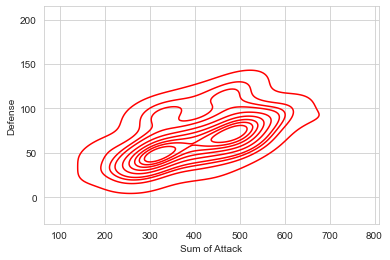

In [67]:
#kernel density plot
sns.kdeplot(x='Sum of Attack',y='Defense',color="Red", data=dataset_pokemon);

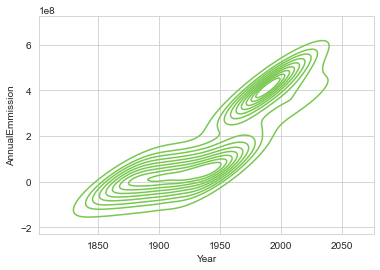

In [68]:
sns.kdeplot(x='Year', y='AnnualEmmission', data=dataset_italy);


### 3. Box and whiskers plots

A Box and Whisker Plot is a convenient way of visually displaying the data distribution through their quartiles.
The lines extending parallel from the boxes are known as the “whiskers”, which are used to indicate variability outside the upper and lower quartiles. Outliers are sometimes plotted as individual dots that are in-line with whiskers.
Here are the types of observations one can make from viewing a Box Plot:

1. What the key values are, such as: the average, median 25th percentile etc?

2. If there are any outliers and what their values are?

3. Is the data symmetrical.

4. How tightly is the data grouped.

5. If the data is skewed and if so, in what direction.

<AxesSubplot:xlabel='PokemonType1', ylabel='Attack'>

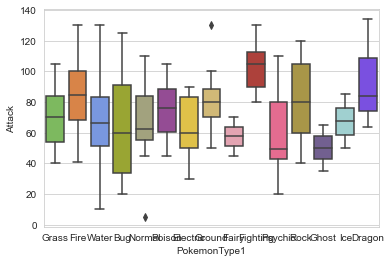

In [70]:
sns.boxplot(x="PokemonType1", y="Attack", data=dataset_pokemon)

<AxesSubplot:xlabel='PokemonType1', ylabel='Attack'>

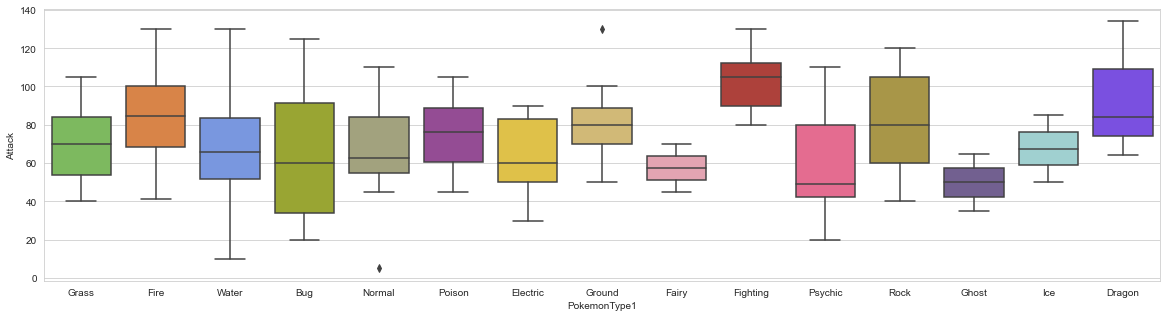

In [71]:
# The boxes are too near let's split them appart
plt.figure(figsize=(20,5))
sns.boxplot(x="PokemonType1", y="Attack", data=dataset_pokemon)

### 4. Heatmap

Heatmap helps us visualize matrix-like data in the form of hot and cold spots. The warm colors indicated sections with the most visitor interaction.

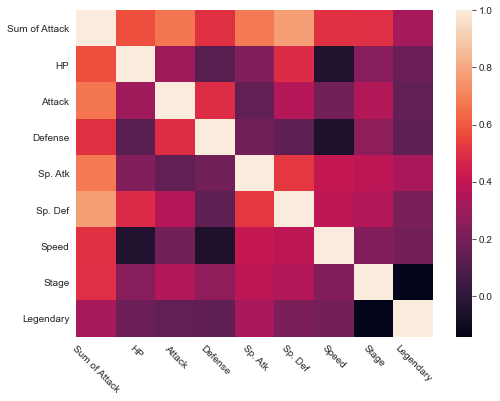

In [72]:
plt.figure(figsize=(8,6));
sns.heatmap(dataset_pokemon.corr());# Rotate x-labels with the help of matplotlib
plt.xticks(rotation=-45);

### Factor Plots

Factor plots make it easy to separate plots by categorical classes. This can be done using the function catplot

<Figure size 360x1080 with 0 Axes>

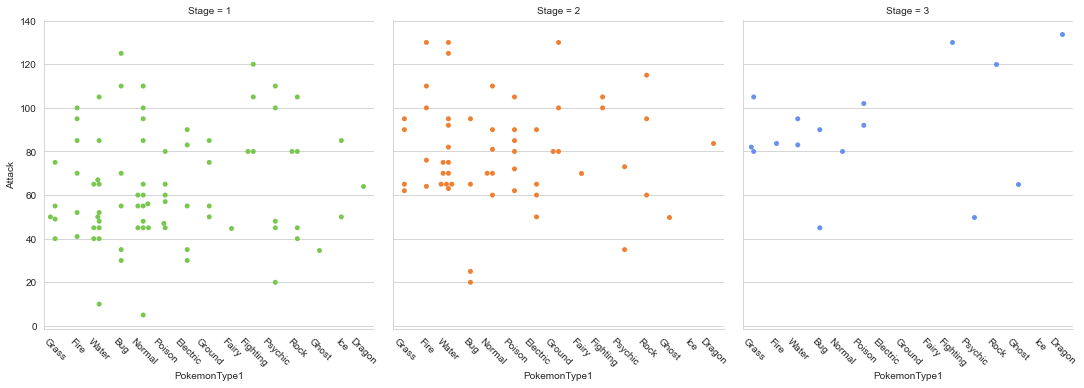

In [74]:
plt.figure(figsize=(5,15))
factplot= sns.catplot(
    x="PokemonType1",
    y="Attack",
    data=dataset_pokemon,
    hue="Stage",
    col="Stage",
    kind="swarm")
factplot.set_xticklabels(rotation=-45)

Actually the catplot is the most general function that allows you to plot any type of data by specifying the type of plot you want.

https://seaborn.pydata.org/tutorial/categorical.html

### Pie Charts

The Python data visualization library Seaborn doesn’t have a default function to create pie charts, but you can use the following syntax in Matplotlib to create a pie chart.

In [85]:
#groupby the data according to the type. 
# We create a pie chart where each slice reppresents the attack sum for that stage (i.e. generation) 
data_pie = dataset_pokemon.groupby("Stage")["Attack"].sum()
data_pie

Stage
1    5032
2    4486
3    1437
Name: Attack, dtype: int64

<AxesSubplot:ylabel='Attack'>

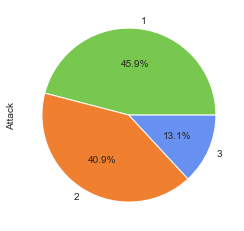

In [86]:
#create pie chart
data_pie.plot.pie(autopct="%.1f%%") #put autopct="%.1f%%" if you want the percentages

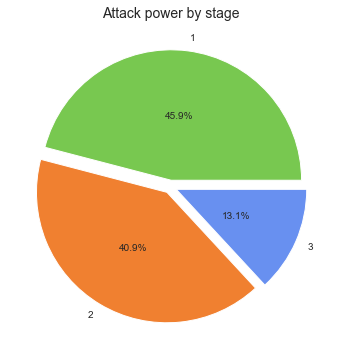

In [87]:
pie, ax = plt.subplots(figsize=[10,6])
## the slices will be ordered and plotted counter-clockwise
labels = data_pie.keys()
plt.pie(x=data_pie, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Attack power by stage", fontsize=14);

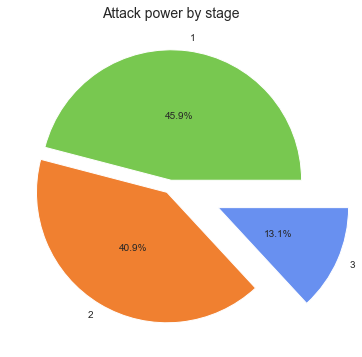

In [88]:
pie, ax = plt.subplots(figsize=[10,6])
## the slices will be ordered and plotted counter-clockwise
labels = data_pie.keys()
# Explode out the '3' pie piece by offsetting it a greater amount
explode=[0.05,0.05,0.4]
plt.pie(x=data_pie, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.5)
plt.title("Attack power by stage", fontsize=14);

### How to save a figure?

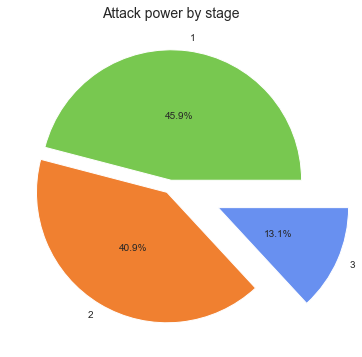

In [89]:
pie, ax = plt.subplots(figsize=[10,6])
## the slices will be ordered and plotted counter-clockwise
labels = data_pie.keys()
# Explode out the '3' pie piece by offsetting it a greater amount
explode=[0.05,0.05,0.4]
plt.pie(x=data_pie, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.5)
plt.title("Attack power by stage", fontsize=14);
plt.savefig('myplot.svg')
